In [1]:
# predicting whether or not a customer will stop making purchases with a company, a condition known as churn. We will be using the fictitious Telco churn data for this project.
# https://www.kaggle.com/datasets/blastchar/telco-customer-churn


#Importing Some Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
#Relaxing display limits on our Pandas data frames rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Read in the data
df=pd.read_csv('telco.csv')

In [4]:
#Displaying head of the dataframe
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop('customerID', axis = 'columns', inplace = True)

<AxesSubplot:>

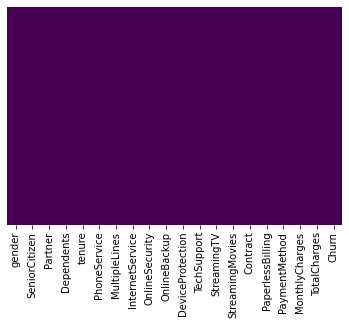

In [7]:
sns.heatmap(df.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [8]:
df = df[df.TotalCharges!= " "]

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [11]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#Turn Object to Number Data
yes_no_columns = ['Partner','Dependents','MultipleLines','PhoneService','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for column in yes_no_columns:
    df[column].replace({'Yes': 1,'No': 0},inplace=True)

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [17]:
df.groupby('InternetService').describe()

SeniorCitizen                                               \
                        count      mean       std  min  25%  50%  75%  max   
InternetService                                                              
DSL                    2416.0  0.107202  0.309434  0.0  0.0  0.0  0.0  1.0   
Fiber optic            3096.0  0.268411  0.443204  0.0  0.0  0.0  1.0  1.0   
No                     1520.0  0.034211  0.181829  0.0  0.0  0.0  0.0  1.0   

                Partner                                               \
                  count      mean       std  min  25%  50%  75%  max   
InternetService                                                        
DSL              2416.0  0.481788  0.499772  0.0  0.0  0.0  1.0  1.0   
Fiber optic      3096.0  0.483204  0.499799  0.0  0.0  0.0  1.0  1.0   
No               1520.0  0.482237  0.499849  0.0  0.0  0.0  1.0  1.0   

                Dependents                                               \
                     count      mean       std  min  25%  50%  75%  max   
InternetService                                                           
DSL                 2416.0  0.331126  0.470716  0.0  0.0  0.0  1.0  1.0   
Fiber optic         3096.0  0.213824  0.410070  0.0  0.0  0.0  0.0  1.0   
No                  1520.0  0.419079  0.493571  0.0  0.0  0.0  1.0  1.0   

                 tenure                                                    \
                  count       mean        std  min  25%   50%   75%   max   
InternetService                                                             
DSL              2416.0  32.889487  24.792818  1.0  9.0  29.0  56.0  72.0   
Fiber optic      3096.0  32.917959  24.425332  1.0  9.0  30.0  56.0  72.0   
No               1520.0  30.667763  24.328631  1.0  8.0  25.0  53.0  72.0   

                PhoneService                                               \
                       count      mean       std  min  25%  50%  75%  max   
InternetService                                                             
DSL                   2416.0  0.718543  0.449803  0.0  0.0  1.0  1.0  1.0   
Fiber optic           3096.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   
No                    1520.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   

                MultipleLines                                               \
                        count      mean       std  min  25%  50%  75%  max   
InternetService                                                              
DSL                    2416.0  0.285182  0.451595  0.0  0.0  0.0  1.0  1.0   
Fiber optic            3096.0  0.625969  0.483950  0.0  0.0  1.0  1.0  1.0   
No                     1520.0  0.223684  0.416850  0.0  0.0  0.0  0.0  1.0   

                OnlineSecurity                                               \
                         count      mean       std  min  25%  50%  75%  max   
InternetService                                                               
DSL                     2416.0  0.486755  0.499928  0.0  0.0  0.0  1.0  1.0   
Fiber optic             3096.0  0.270995  0.444545  0.0  0.0  0.0  1.0  1.0   
No                      1520.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

                OnlineBackup                                               \
                       count      mean       std  min  25%  50%  75%  max   
InternetService                                                             
DSL                   2416.0  0.447848  0.497376  0.0  0.0  0.0  1.0  1.0   
Fiber optic           3096.0  0.433786  0.495676  0.0  0.0  0.0  1.0  1.0   
No                    1520.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0   

                DeviceProtection                                               \
                           count      mean       std  min  25%  50%  75%  max   
InternetService                                                                 
DSL                       2416.0  0.439156  0.496387  0.0  0.0  0.0  1.0  1.0   
Fiber 

In [18]:
df.groupby('Contract').describe()

SeniorCitizen                                               \
                       count      mean       std  min  25%  50%  75%  max   
Contract                                                                    
Month-to-month        3875.0  0.208258  0.406115  0.0  0.0  0.0  0.0  1.0   
One year              1472.0  0.129076  0.335398  0.0  0.0  0.0  0.0  1.0   
Two year              1685.0  0.086053  0.280526  0.0  0.0  0.0  0.0  1.0   

               Partner                                               \
                 count      mean       std  min  25%  50%  75%  max   
Contract                                                              
Month-to-month  3875.0  0.356129  0.478916  0.0  0.0  0.0  1.0  1.0   
One year        1472.0  0.563179  0.496161  0.0  0.0  1.0  1.0  1.0   
Two year        1685.0  0.702671  0.457218  0.0  0.0  1.0  1.0  1.0   

               Dependents                                               \
                    count      mean       std  min  25%  50%  75%  max   
Contract                                                                 
Month-to-month     3875.0  0.203613  0.402736  0.0  0.0  0.0  0.0  1.0   
One year           1472.0  0.360054  0.480179  0.0  0.0  0.0  1.0  1.0   
Two year           1685.0  0.462908  0.498770  0.0  0.0  0.0  1.0  1.0   

                tenure                                                     \
                 count       mean        std  min   25%   50%   75%   max   
Contract                                                                    
Month-to-month  3875.0  18.036645  17.689054  1.0   3.0  12.0  29.0  72.0   
One year        1472.0  42.073370  19.010750  1.0  27.0  44.0  58.0  72.0   
Two year        1685.0  57.071810  17.729130  1.0  48.0  64.0  71.0  72.0   

               PhoneService                                               \
                      count      mean       std  min  25%  50%  75%  max   
Contract                                                                   
Month-to-month       3875.0  0.902968  0.296040  0.0  1.0  1.0  1.0  1.0   
One year             1472.0  0.901495  0.298098  0.0  1.0  1.0  1.0  1.0   
Two year             1685.0  0.905638  0.292418  0.0  1.0  1.0  1.0  1.0   

               MultipleLines                                               \
                       count      mean       std  min  25%  50%  75%  max   
Contract                                                                    
Month-to-month        3875.0  0.382452  0.486049  0.0  0.0  0.0  1.0  1.0   
One year              1472.0  0.418478  0.493477  0.0  0.0  0.0  1.0  1.0   
Two year              1685.0  0.515727  0.499901  0.0  0.0  1.0  1.0  1.0   

               OnlineSecurity                                               \
                        count      mean       std  min  25%  50%  75%  max   
Contract                                                                     
Month-to-month         3875.0  0.185806  0.389001  0.0  0.0  0.0  0.0  1.0   
One year               1472.0  0.375000  0.484287  0.0  0.0  0.0  1.0  1.0   
Two year               1685.0  0.440950  0.496648  0.0  0.0  0.0  1.0  1.0   

               OnlineBackup                                               \
                      count      mean       std  min  25%  50%  75%  max   
Contract                                                                   
Month-to-month       3875.0  0.274323  0.446230  0.0  0.0  0.0  1.0  1.0   
One year             1472.0  0.422554  0.494134  0.0  0.0  0.0  1.0  1.0   
Two year             1685.0  0.439169  0.496433  0.0  0.0  0.0  1.0  1.0   

               DeviceProtection                                               \
                          count      mean       std  min  25%  50%  75%  max   
Contract                                                                       
Month-to-month           3875.0  0.246968  0.431303  0.0  0.0  0.0  0.0  1.0   
One year                 1472.0  0.438859  0.496416

In [19]:
encode = ['gender','InternetService','Contract','PaymentMethod']

for col in encode:

    dummy = pd.get_dummies(df[col], prefix=col)

    df = pd.concat([df,dummy], axis=1)

    del df[col]

In [20]:
df.groupby("Churn").describe()

SeniorCitizen                                              Partner  \
              count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                      
0            5163.0  0.128995  0.335227  0.0  0.0  0.0  0.0  1.0  5163.0   
1            1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0  1869.0   

                                                   Dependents            \
           mean       std  min  25%  50%  75%  max      count      mean   
Churn                                                                     
0      0.527600  0.499286  0.0  0.0  1.0  1.0  1.0     5163.0  0.343405   
1      0.357945  0.479524  0.0  0.0  0.0  1.0  1.0     1869.0  0.174425   

                                          tenure                             \
            std  min  25%  50%  75%  max   count       mean        std  min   
Churn                                                                         
0      0.474891  0.0  0.0  0.0  1.0  1.0  5163.0  37.650010  24.076940  1.0   
1      0.379576  0.0  0.0  0.0  0.0  1.0  1869.0  17.979133  19.531123  1.0   

                              PhoneService                                     \
        25%   50%   75%   max        count      mean       std  min  25%  50%   
Churn                                                                           
0      15.0  38.0  61.0  72.0       5163.0  0.901220  0.298395  0.0  1.0  1.0   
1       2.0  10.0  29.0  72.0       1869.0  0.909042  0.287626  0.0  1.0  1.0   

                MultipleLines                                               \
       75%  max         count      mean       std  min  25%  50%  75%  max   
Churn                                                                        
0      1.0  1.0        5163.0  0.410033  0.491887  0.0  0.0  0.0  1.0  1.0   
1      1.0  1.0        1869.0  0.454789  0.498085  0.0  0.0  0.0  1.0  1.0   

      OnlineSecurity                                               \
               count      mean       std  min  25%  50%  75%  max   
Churn                                                               
0             5163.0  0.333140  0.471382  0.0  0.0  0.0  1.0  1.0   
1             1869.0  0.157838  0.364687  0.0  0.0  0.0  0.0  1.0   

      OnlineBackup                                               \
             count      mean       std  min  25%  50%  75%  max   
Churn                                                             
0           5163.0  0.368390  0.482415  0.0  0.0  0.0  1.0  1.0   
1           1869.0  0.279829  0.449035  0.0  0.0  0.0  1.0  1.0   

      DeviceProtection                                               \
                 count      mean       std  min  25%  50%  75%  max   
Churn                                                                 
0               5163.0  0.362774  0.480847  0.0  0.0  0.0  1.0  1.0   
1               1869.0  0.291600  0.454621  0.0  0.0  0.0  1.0  1.0   

      TechSupport                                              StreamingTV  \
            count      mean       std  min  25%  50%  75%  max       count   
Churn                                                                        
0          5163.0  0.335077  0.472063  0.0  0.0  0.0  1.0  1.0      5163.0   
1          1869.0  0.165864  0.372058  0.0  0.0  0.0  0.0  1.0      1869.0   

                                                   StreamingMovies            \
           mean       std  min  25%  50%  75%  max           count      mean   
Churn                                                                          
0      0.365873  0.481721  0.0  0.0  0.0  1.0  1.0          5163.0  0.370521   
1      0.435527  0.495959  0.0  0.0  0.0  1.0  1.0          1869.0  0.437667   

                                         PaperlessBilling                      \
            std  min  25%  50%  75%  max            count      mean       std   
Churn                                                           

In [21]:
df.drop('MultipleLines',axis=1,inplace=True)

In [22]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,1,0,0,0,0,1,0


In [23]:
df.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [24]:
X = df[['tenure','MonthlyCharges','gender_Female','gender_Male',
       'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check']]

Y = df['Churn']

In [25]:
rfc=RandomForestClassifier()

In [26]:
rfc.fit(X,Y)

RandomForestClassifier()

In [27]:
pickle.dump(rfc, open('churn_clf.pkl', 'wb'))